# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Tonny | Chuwa | Tonny Peter Chuwa, 14/10/2024 |9 Hours | 25% |
| Member 2: | Gagan | Kataria |Gagan Kataria, 14/10/2024 |8 Hours | 25% |
| Member 3: | Augustine | Ikechukwu | Augustine Ikechukwu Ojumah, 14/10/2024 |8 Hours | 25% |
| Member 4: | Abraham | Tesfamichael | Abraham Yihdego Tesfamichael, 14/10/2024 |8 Hours | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

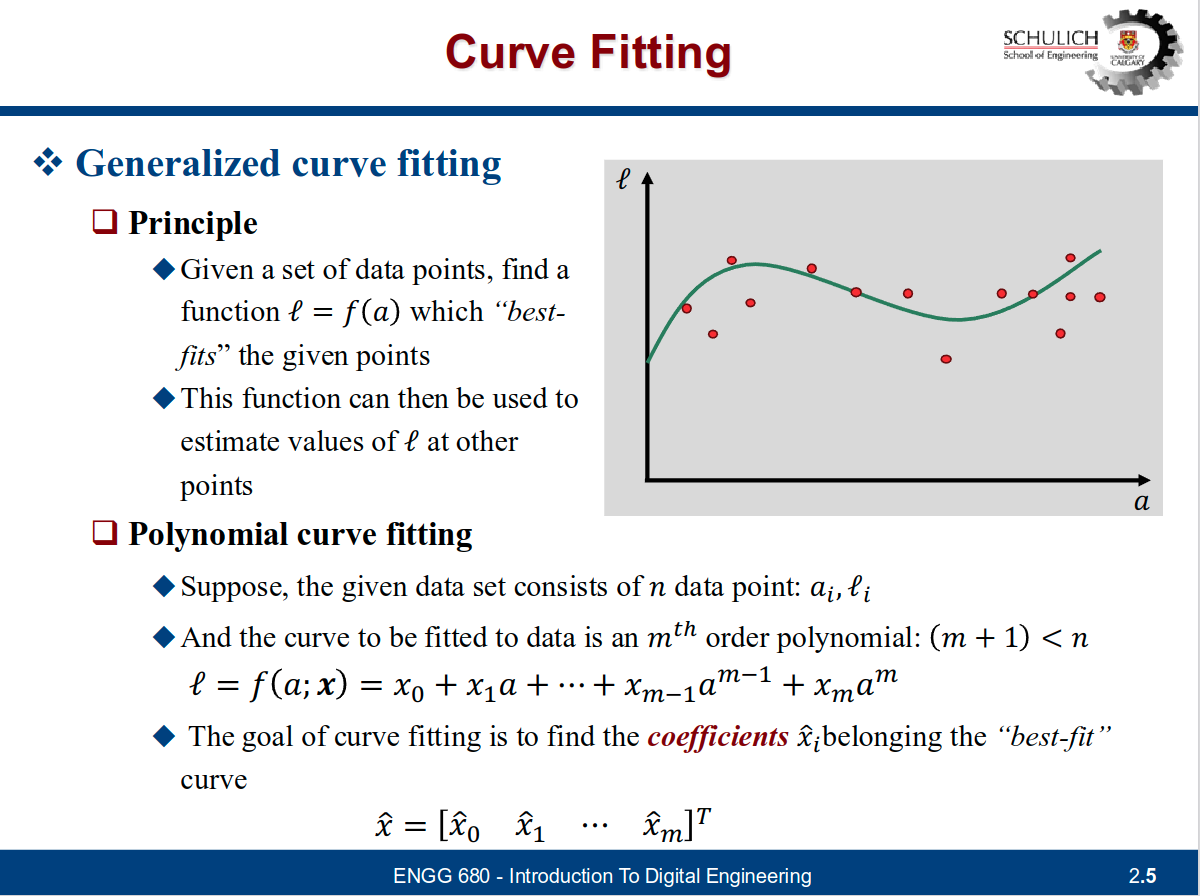

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [2]:
# step 1
# import necessary libraries
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
!pip install openpyxl
from google.colab import files
uploaded = files.upload()
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]  # Noisy observations (1st column)
l_var = arr_data[:, 1]  # Variance of observations (2nd column)
l_true = arr_data[:, 2] # True observations (3rd column)

Saving data.xlsx to data.xlsx


In [4]:
# step 3
# define the number of observation n
# (1 mark)
n = arr_data.shape[0]
#The number of observations 𝑛 in a dataset refers to the total count of individual data points or entries collected in the study or analysis. Each observation represents a single instance or record, which may consist of various features or attributes

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


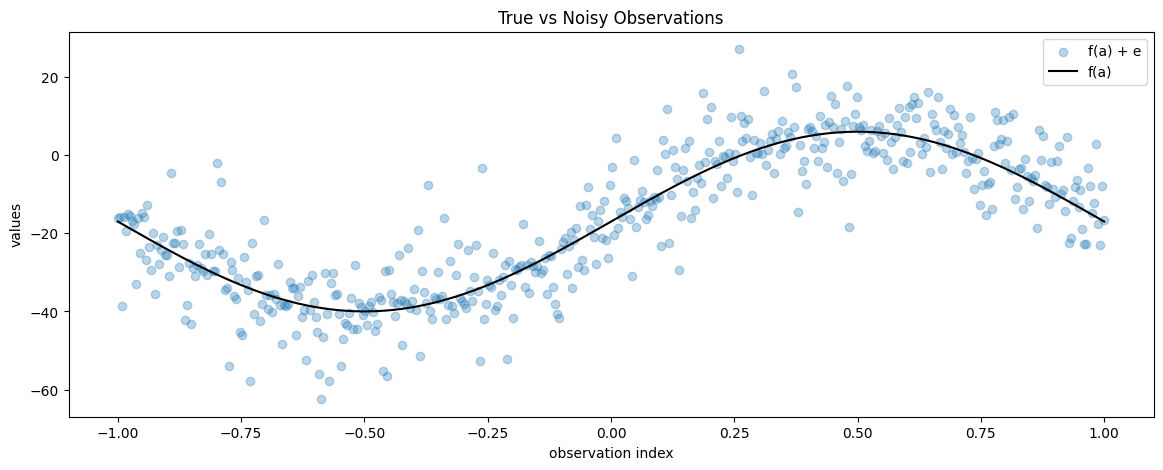

In [5]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Generate x-values ranging from -1 to 1
x_values = np.linspace(-1, 1, len(l))
# Create the scatter plot
ax.scatter(x_values, l,
           label='f(a) + e', color='tab:blue',
           marker='o', alpha=0.3)
# Plot the true observations as a line
ax.plot(x_values, l_true,
        label='f(a)', color='k')
# Add labels and legend
ax.set_xlabel('observation index')
ax.set_ylabel('values')
ax.set_title('True vs Noisy Observations')
ax.legend()

In [6]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

  # i. # ccc Matrix A contain row [1,a,a^2,...,a^deg] based on the polynomial degree
    A = np.vstack([a**i for i in range(deg + 1)]).T

  # ii. Carryout the weighted least square estimation (LSE)
  # Calculate the normal equation x = (A^T P A)^-1 A^T P l
  # Firstly, Evaluate A^T * P
    AtP = A.T @ P

  # iii. Solve (A^T * P * A)^-1
    AtPA_inv = np.linalg.inv(AtP @ A)

  # iv. Estimated coefficient x is given as
    x = AtPA_inv @ (AtP @ l)

  # v. Evaluate the covariance matrix of x (cov_x)
    cov_x = AtPA_inv

  # vi. residual is given as (v = 1 - A * x)
    v = l - A @ x

  # vii. Evaluate the posterier variance factor (apv)
  # apv = (v^T * P * v) / (n - m), where n is the number of observations and m is the number of parameters
    apv = (v.T @ P @ v) / (n - (deg + 1))



    return (x, cov_x, apv, v)

In [7]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Call fit_polynomial_curve for degree 1
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)
print(f"Degree 1: Coefficients = {x_deg1}, APV = {apv_deg1}")

# Call fit_polynomial_curve for degree 3
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)
print(f"Degree 3: Coefficients = {x_deg3}, APV = {apv_deg3}")

# Call fit_polynomial_curve for degree 5
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)
print(f"Degree 5: Coefficients = {x_deg5}, APV = {apv_deg5}")


Degree 1: Coefficients = [-16.59352348   7.25633807], APV = 162.742608604322
Degree 3: Coefficients = [-16.72496774  19.63961372   0.03979476  -2.08281013], APV = 66.13227783131883
Degree 5: Coefficients = [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01], APV = 63.7583446301842


In [8]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x_deg1[::-1], a)
cubic_uw = np.polyval(x_deg3[::-1], a)
quintic_uw = np.polyval(x_deg5[::-1], a)

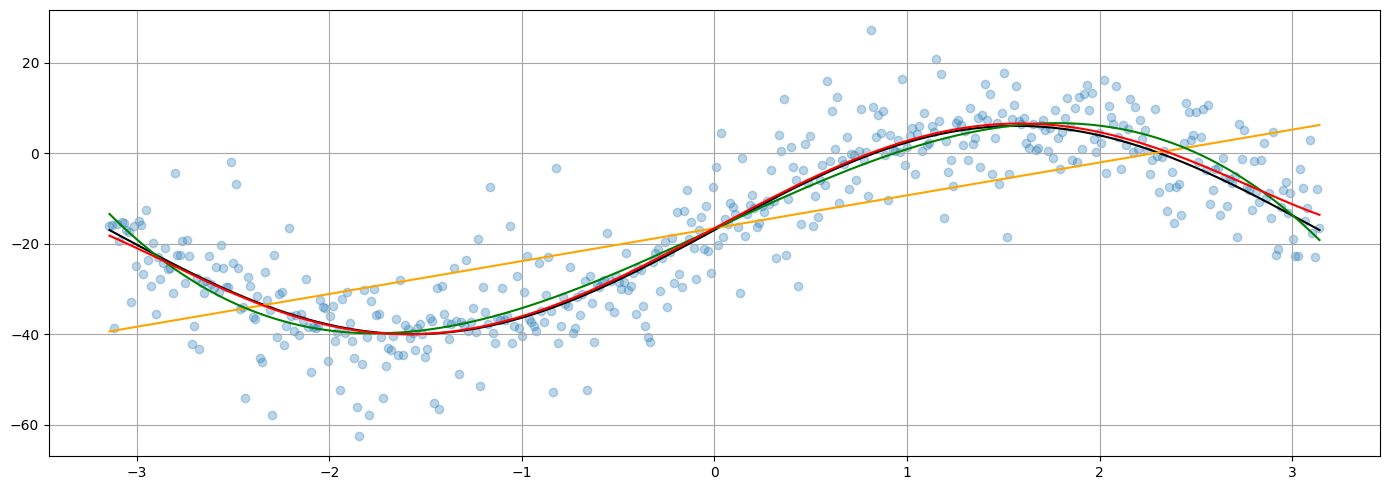

In [9]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot the noisy observations
ax.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)

# Plot the true observations
ax.plot(a, l_true, label='True Observations (f(a))', color='k')

# Plot the polynomial functions
ax.plot(a, line_uw, label='Linear Fit (Degree 1)', color='orange')  # Linear
ax.plot(a, cubic_uw, label='Cubic Fit (Degree 3)', color='green')   # Cubic
ax.plot(a, quintic_uw, label='Quintic Fit (Degree 5)', color='red') # Quintic


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [10]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print(f"A Posteriori Variance Factor (APV) for Degree 1 Polynomial: {apv_deg1}")
print(f"A Posteriori Variance Factor (APV) for Degree 3 Polynomial: {apv_deg3}")
print(f"A Posteriori Variance Factor (APV) for Degree 5 Polynomial: {apv_deg5}")


A Posteriori Variance Factor (APV) for Degree 1 Polynomial: 162.742608604322
A Posteriori Variance Factor (APV) for Degree 3 Polynomial: 66.13227783131883
A Posteriori Variance Factor (APV) for Degree 5 Polynomial: 63.7583446301842


In [11]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Norm between the predicted and true observations from each polynomial
norm_deg1 = np.linalg.norm(line_uw - l_true)    # Norm for the linear (degree 1) polynomial
norm_deg3 = np.linalg.norm(cubic_uw - l_true)   # Norm for the cubic (degree 3) polynomial
norm_deg5 = np.linalg.norm(quintic_uw - l_true) # Norm for the quintic (degree 5) polynomial

# Output
print(f"Norm between Degree 1 Polynomial and True Observations: {norm_deg1}")
print(f"Norm between Degree 3 Polynomial and True Observations: {norm_deg3}")
print(f"Norm between Degree 5 Polynomial and True Observations: {norm_deg5}")

Norm between Degree 1 Polynomial and True Observations: 229.06016796744092
Norm between Degree 3 Polynomial and True Observations: 38.28597992911668
Norm between Degree 5 Polynomial and True Observations: 17.369967196965185


In [12]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

# As the degree of the polynomial increases from 1 to 5, I observe that the a posterier variance factor (APV) decreases.
# This suggests that higher-degree polynomials are better at fitting the noisy data.
# Similarly, the norm between the predicted and true observations also decreases, indicating that the higher-degree polynomials are providing a closer fit to the true observations.'

In [13]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

A Posteriori Variance Factor (APV) for Degree 1 Polynomial: 12.054651233436907
A Posteriori Variance Factor (APV) for Degree 3 Polynomial: 1.1444647026537131
A Posteriori Variance Factor (APV) for Degree 5 Polynomial: 0.9447009043856547
Norm between Degree 1 Polynomial and True Observations: 230.67760813832942
Norm between Degree 3 Polynomial and True Observations: 36.070266872667986
Norm between Degree 5 Polynomial and True Observations: 5.741606915885506


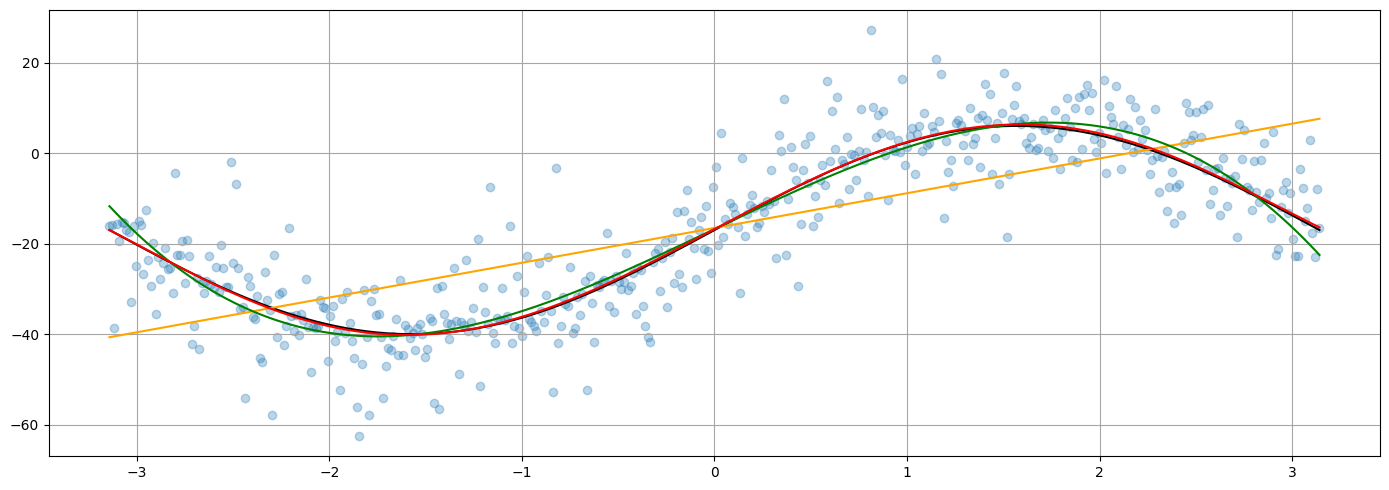

In [14]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# i. Call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, deg=1)
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, deg=3)
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, deg=5)

# ii. use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
line_uw = np.polyval(x_deg1[::-1], a)
cubic_uw = np.polyval(x_deg3[::-1], a)
quintic_uw = np.polyval(x_deg5[::-1], a)

# iii. use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plot the noisy observations
ax.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)

# Plot the true observations
ax.plot(a, l_true, label='True Observations (f(a))', color='k')

# Plot the polynomial functions
ax.plot(a, line_uw, label='Linear Fit (Degree 1)', color='orange')  # Linear
ax.plot(a, cubic_uw, label='Cubic Fit (Degree 3)', color='green')   # Cubic
ax.plot(a, quintic_uw, label='Quintic Fit (Degree 5)', color='red') # Quintic


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# iv. print the a posterier variance factor for each polynomial functio
print(f"A Posteriori Variance Factor (APV) for Degree 1 Polynomial: {apv_deg1}")
print(f"A Posteriori Variance Factor (APV) for Degree 3 Polynomial: {apv_deg3}")
print(f"A Posteriori Variance Factor (APV) for Degree 5 Polynomial: {apv_deg5}")

# v. compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
norm_deg1 = np.linalg.norm(line_uw - l_true)    # Norm for the linear (degree 1) polynomial
norm_deg3 = np.linalg.norm(cubic_uw - l_true)   # Norm for the cubic (degree 3) polynomial
norm_deg5 = np.linalg.norm(quintic_uw - l_true) # Norm for the quintic (degree 5) polynomial

print(f"Norm between Degree 1 Polynomial and True Observations: {norm_deg1}")
print(f"Norm between Degree 3 Polynomial and True Observations: {norm_deg3}")
print(f"Norm between Degree 5 Polynomial and True Observations: {norm_deg5}")

In [15]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# APV and Norm Comparison: "From the results, I observe that the APV and norm values from the weighted LSE are generally smaller than those from the unweighted LSE.
# This suggests that the weighted LSE, by giving more weight to observations with lower variance, provides a better fit to the true data.
# In contrast, the unweighted LSE treats all observations equally, which might lead to a suboptimal fit, especially when the data contains noisy observations with high variance."
# Phenomenon Explanation: "The key phenomenon observed here is the importance of accounting for the variance in observations.
# The weighted LSE helps to emphasize the more reliable observations (those with lower variance), which improves the model's fit to the true underlying function.
# On the other hand, the unweighted LSE doesn't account for this variability, and hence, the resulting model may not represent the true data as accurately, especially when there is significant noise in the observations."

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

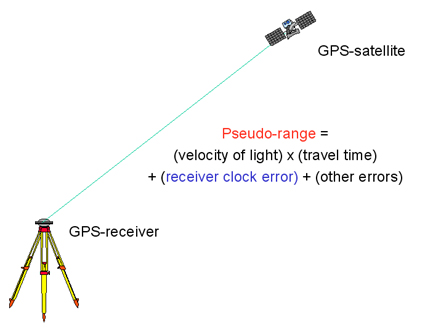

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel("/content/pseudoranges.xlsx")
df_sat_pos = pd.read_excel("/content/satellite_position.xlsx")

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()
print (df_pseudorange)
print (df_sat_pos)

    Satellite_ID             P
0              7  2.291974e+07
1              8  2.045989e+07
2             11  2.240034e+07
3             15  2.282914e+07
4             17  2.234201e+07
5             18  2.564645e+07
6             19  2.381478e+07
7             24  2.431140e+07
8             26  2.135364e+07
9             27  2.497161e+07
10            28  2.063898e+07
    Satellite_ID             x             y             z
0              7  5.280792e+06 -2.550146e+07  4.649508e+06
1              8 -2.159656e+06 -2.111602e+07  1.559791e+07
2             11  1.037185e+07 -2.171311e+07  1.055869e+07
3             15 -1.608576e+07  4.285071e+06  2.074204e+07
4             17 -1.431299e+07 -2.204501e+07  4.671208e+06
5             18 -2.435718e+06  1.625721e+07  2.109978e+07
6             19  1.591247e+07 -3.462515e+06  2.105363e+07
7             24  1.627185e+07 -2.187663e+05  2.103533e+07
8             26 -1.924704e+07 -7.259804e+06  1.647298e+07
9             27 -1.593115e+07  1.2077

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = 11  # Number of measurements
m = 4  # Number of states
xr = 0
yr = 0
zr = 0
cdT = 0
states = [xr, yr, zr, cdT]
print(f"Number of Measurements (n): {n}")
print(f"Number of States (m): {m}")

Number of Measurements (n): 11
Number of States (m): 4


In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
import numpy as np
P = np.eye(n)
print ("The weight matrix (P) is:\n", P)

The weight matrix (P) is:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
import numpy as np


# Number of states
m = 4  #  number of states

# Initialize the state vector with zeros
initial_state = np.zeros(m)

print("Initial State Vector x_0:")
print(initial_state)

Initial State Vector x_0:
[0. 0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

import numpy as np

# Ground truth coordinates of the receiver
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Print the ground truth coordinates
print("Ground Truth Coordinates of the Receiver:")
print(GroundTruth)

Ground Truth Coordinates of the Receiver:
[-1633489.37967725 -3651627.18250363  4952481.61954918]


In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
import pandas as pd

import numpy as np # import numpy library with alias np

delta = np.ones(4) #corrections array as ones

i = 0 #iteration loop counter I as zero

arr_x = []
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []

# Assigning initial_state
x_0 = np.zeros(4)  # Assuming 4 states

x_hat = x_0.copy()

receiver_pos = x_hat[:3]  # Extract receiver position

# **Load your satellite position data into df_sat_pos
# Replace 'path/to/your/satellite_data.csv' with the actual path to your data file
asd = 'satellite_position.xlsx'
df_sat_pos = pd.read_excel(asd)
satellite_pos = df_sat_pos.iloc[:, 1:4].to_numpy()  # Extract satellite positions

# Check the updated x_hat
print("Initial x_hat:", x_hat)
print("Initial receiver position:", receiver_pos)
print("Initial satellite positions:\n", satellite_pos)

# Optional for additional analysis
arr_apv = []  # to store a Posteriori Variance of Unit Weight
arr_C_x_hat = []  # to store Covariance Matrices

Initial x_hat: [0. 0. 0. 0.]
Initial receiver position: [0. 0. 0.]
Initial satellite positions:
 [[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035.5286677   -7259803.67892242  16472981.9071979 ]
 [-15931152.0364578   12077367.2515846   18058076.7648504 ]
 [ -7680014.10843999 -13855462.7231353   21842975.3728112 ]]


In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
    differences = satellite_pos - receiver_pos[:3]  # Exclude clock bias
    geometric_distance = np.linalg.norm(differences, axis=1)
    return geometric_distance

# Step to compute geometric distances
geometric_distances = euclidean_norm(x_hat, satellite_pos)

print("Geometric Distances:\n", geometric_distances)

# Check if the distances are unique
print("Unique Geometric Distances:\n", np.unique(geometric_distances))

print ("estimated states\n", x_hat)
print ("satellite psoitions:\n", satellite_pos)
print ("receiver positions:\n", receiver_pos)

Geometric Distances:
 [26454284.28283253 26340945.09697588 26277754.71787928 26595974.25813834
 26695776.25180958 26747525.83435867 26616740.72663527 26595227.45399327
 26353600.49429986 26939906.11311798 26982810.03000365]
Unique Geometric Distances:
 [26277754.71787928 26340945.09697588 26353600.49429986 26454284.28283253
 26595227.45399327 26595974.25813834 26616740.72663527 26695776.25180958
 26747525.83435867 26939906.11311798 26982810.03000365]
estimated states
 [0. 0. 0. 0.]
satellite psoitions:
 [[  5280791.73836563 -25501460.1192133    4649508.28809917]
 [ -2159656.05205653 -21116024.7920163   15597909.1971221 ]
 [ 10371852.1682927  -21713111.3497771   10558686.998121  ]
 [-16085760.7811889    4285071.21612309  20742042.1246963 ]
 [-14312988.0806279  -22045014.2659254    4671208.3988653 ]
 [ -2435718.18737303  16257205.12951     21099779.5379103 ]
 [ 15912467.1868696   -3462515.31492602  21053628.253335  ]
 [ 16271848.163885     -218766.32031082  21035332.7037679 ]
 [-19247035

In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
